# **Menampilkan Data**

In [ ]:
import pandas as pd

data = {
    "Mental Impair (Y)": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    "Life Event (X1)": [46, 39, 27, 50, 48, 45, 44, 35, 95, 35]
}

df = pd.DataFrame(data)
print(df)


   Mental Impair (Y)  Life Event (X1)
0                  0               46
1                  0               39
2                  0               27
3                  0               50
4                  1               48
5                  1               45
6                  1               44
7                  1               35
8                  1               95
9                  1               35


In [ ]:
import statsmodels.api as sm

df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mental Impair (Y)         10 non-null     int64  
 1   Life Event (X1)           10 non-null     int64  
 2   Z                         10 non-null     float64
 3   P(Y=1|X)                  10 non-null     float64
 4   Log-Likelihood Component  10 non-null     float64
 5   Exponential PDF           10 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 608.0 bytes
None


# **Memisahkan Data ke X_train dan y_train**

In [ ]:

X = df[["Life Event (X1)"]]
y = df["Mental Impair (Y)"]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:\n", X_train.head())
print("\ny_train:\n", y_train.head())

X_train_exog = sm.add_constant(X_train)
print("X_train_exog (dengan intercept):\n", X_train_exog.head())

log_reg = sm.Logit(y_train, X_train_exog)
result = log_reg.fit()

log_reg_summary = result.summary()
print(log_reg_summary)



X_train:
    Life Event (X1)
0               46
7               35
2               27
9               35
4               48

y_train:
 0    0
7    1
2    0
9    1
4    1
Name: Mental Impair (Y), dtype: int64
X_train_exog (dengan intercept):
    const  Life Event (X1)
0    1.0               46
7    1.0               35
2    1.0               27
9    1.0               35
4    1.0               48
Optimization terminated successfully.
         Current function value: 0.682411
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Mental Impair (Y)   No. Observations:                    7
Model:                          Logit   Df Residuals:                        5
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:               0.0007286
Time:                        11:11:04   Log-Likelihood:                -4.7769
converged:                

In [ ]:

print("Tipe data setiap kolom dalam DataFrame:")
print(df.dtypes)

numerik = df.select_dtypes(include=['float64', 'int64'])
kategorik = df.select_dtypes(include=['object', 'category'])

print("\nVariabel Numerik:")
print(numerik.head())

print("\nVariabel Kategorik:")
print(kategorik.head())

Tipe data setiap kolom dalam DataFrame:
Mental Impair (Y)             int64
Life Event (X1)               int64
Z                           float64
P(Y=1|X)                    float64
Log-Likelihood Component    float64
Exponential PDF             float64
dtype: object

Variabel Numerik:
   Mental Impair (Y)  Life Event (X1)     Z  P(Y=1|X)  \
0                  0               46  0.56  0.636453   
1                  0               39  0.49  0.620106   
2                  0               27  0.37  0.591459   
3                  0               50  0.60  0.645656   
4                  1               48  0.58  0.641067   

   Log-Likelihood Component  Exponential PDF  
0                 -1.011845         0.363547  
1                 -0.967864         0.379894  
2                 -0.895163         0.408541  
3                 -1.037488         0.354344  
4                 -0.444621         0.641067  

Variabel Kategorik:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]






# **Fungsi Density Probabilitas**

In [ ]:
import numpy as np

def logistic(z):
    return 1 / (1 + np.exp(-z))

beta_0 = 0.1
beta_1 = 0.01

df["Z"] = beta_0 + beta_1 * df["Life Event (X1)"]
df["P(Y=1|X)"] = logistic(df["Z"])


print("\nPerhitungan PDF Logistic Regression:")
for i, row in df.iterrows():
    print(f"Data {i + 1}:")
    print(f"  Z = β₀ + β₁ * X₁ = {beta_0} + {beta_1} * {row['Life Event (X1)']} = {row['Z']:.4f}")
    print(f"  P(Y=1|X) = 1 / (1 + e^(-Z)) = {row['P(Y=1|X)']:.4f}\n")



Perhitungan PDF Logistic Regression:
Data 1:
  Z = β₀ + β₁ * X₁ = 0.1 + 0.01 * 46.0 = 0.5600
  P(Y=1|X) = 1 / (1 + e^(-Z)) = 0.6365

Data 2:
  Z = β₀ + β₁ * X₁ = 0.1 + 0.01 * 39.0 = 0.4900
  P(Y=1|X) = 1 / (1 + e^(-Z)) = 0.6201

Data 3:
  Z = β₀ + β₁ * X₁ = 0.1 + 0.01 * 27.0 = 0.3700
  P(Y=1|X) = 1 / (1 + e^(-Z)) = 0.5915

Data 4:
  Z = β₀ + β₁ * X₁ = 0.1 + 0.01 * 50.0 = 0.6000
  P(Y=1|X) = 1 / (1 + e^(-Z)) = 0.6457

Data 5:
  Z = β₀ + β₁ * X₁ = 0.1 + 0.01 * 48.0 = 0.5800
  P(Y=1|X) = 1 / (1 + e^(-Z)) = 0.6411

Data 6:
  Z = β₀ + β₁ * X₁ = 0.1 + 0.01 * 45.0 = 0.5500
  P(Y=1|X) = 1 / (1 + e^(-Z)) = 0.6341

Data 7:
  Z = β₀ + β₁ * X₁ = 0.1 + 0.01 * 44.0 = 0.5400
  P(Y=1|X) = 1 / (1 + e^(-Z)) = 0.6318

Data 8:
  Z = β₀ + β₁ * X₁ = 0.1 + 0.01 * 35.0 = 0.4500
  P(Y=1|X) = 1 / (1 + e^(-Z)) = 0.6106

Data 9:
  Z = β₀ + β₁ * X₁ = 0.1 + 0.01 * 95.0 = 1.0500
  P(Y=1|X) = 1 / (1 + e^(-Z)) = 0.7408

Data 10:
  Z = β₀ + β₁ * X₁ = 0.1 + 0.01 * 35.0 = 0.4500
  P(Y=1|X) = 1 / (1 + e^(-Z)) = 0.6106



# **Log Likelihood**

In [ ]:

df["Log-Likelihood Component"] = df["Mental Impair (Y)"] * df["Z"] - np.log(1 + np.exp(df["Z"]))

log_likelihood = df["Log-Likelihood Component"].sum()

print("\nLangkah Perhitungan Log-Likelihood:")
for i, row in df.iterrows():
    print(f"Data {i + 1}:")
    print(f"  Yi * Zi = {row['Mental Impair (Y)']} * {row['Z']:.4f} = {(row['Mental Impair (Y)'] * row['Z']):.4f}")
    print(f"  log(1 + exp(Z_i)) = log(1 + exp({row['Z']:.4f})) = {np.log(1 + np.exp(row['Z'])):.4f}")
    print(f"  Komponen = {row['Log-Likelihood Component']:.4f}\n")

print(f"Log-Likelihood Total = {log_likelihood:.4f}")



Langkah Perhitungan Log-Likelihood:
Data 1:
  Yi * Zi = 0.0 * 0.5600 = 0.0000
  log(1 + exp(Z_i)) = log(1 + exp(0.5600)) = 1.0118
  Komponen = -1.0118

Data 2:
  Yi * Zi = 0.0 * 0.4900 = 0.0000
  log(1 + exp(Z_i)) = log(1 + exp(0.4900)) = 0.9679
  Komponen = -0.9679

Data 3:
  Yi * Zi = 0.0 * 0.3700 = 0.0000
  log(1 + exp(Z_i)) = log(1 + exp(0.3700)) = 0.8952
  Komponen = -0.8952

Data 4:
  Yi * Zi = 0.0 * 0.6000 = 0.0000
  log(1 + exp(Z_i)) = log(1 + exp(0.6000)) = 1.0375
  Komponen = -1.0375

Data 5:
  Yi * Zi = 1.0 * 0.5800 = 0.5800
  log(1 + exp(Z_i)) = log(1 + exp(0.5800)) = 1.0246
  Komponen = -0.4446

Data 6:
  Yi * Zi = 1.0 * 0.5500 = 0.5500
  log(1 + exp(Z_i)) = log(1 + exp(0.5500)) = 1.0055
  Komponen = -0.4555

Data 7:
  Yi * Zi = 1.0 * 0.5400 = 0.5400
  log(1 + exp(Z_i)) = log(1 + exp(0.5400)) = 0.9992
  Komponen = -0.4592

Data 8:
  Yi * Zi = 1.0 * 0.4500 = 0.4500
  log(1 + exp(Z_i)) = log(1 + exp(0.4500)) = 0.9432
  Komponen = -0.4932

Data 9:
  Yi * Zi = 1.0 * 1.0500 = 

# **Eksponensial kedua ruas**

In [ ]:

df["Exponential PDF"] = np.exp(df["Log-Likelihood Component"])

print("\nLangkah Perhitungan PDF Eksponensial:")
for i, row in df.iterrows():
    print(f"Data {i + 1}:")
    print(f"  Eksponensial = exp({row['Log-Likelihood Component']:.4f}) = {row['Exponential PDF']:.4f}\n")


Langkah Perhitungan PDF Eksponensial:
Data 1:
  Eksponensial = exp(-1.0118) = 0.3635

Data 2:
  Eksponensial = exp(-0.9679) = 0.3799

Data 3:
  Eksponensial = exp(-0.8952) = 0.4085

Data 4:
  Eksponensial = exp(-1.0375) = 0.3543

Data 5:
  Eksponensial = exp(-0.4446) = 0.6411

Data 6:
  Eksponensial = exp(-0.4555) = 0.6341

Data 7:
  Eksponensial = exp(-0.4592) = 0.6318

Data 8:
  Eksponensial = exp(-0.4932) = 0.6106

Data 9:
  Eksponensial = exp(-0.3001) = 0.7408

Data 10:
  Eksponensial = exp(-0.4932) = 0.6106



# **Maximum likelihood**

In [ ]:
from sympy import symbols, exp, log
import numpy as np

# === Definisikan variabel === #
beta_0, beta_1, X, Y = symbols("beta_0 beta_1 X Y")

sigmoid = 1 / (exp(-beta_1 * X - beta_0) + 1)

term1 = Y * log(sigmoid)
term2 = (1 - Y) * log(1 - sigmoid)
log_likelihood = term1 + term2

print("Rumus Log-Likelihood:")
print(f"L(beta) = {log_likelihood}\n")

# === Langkah perhitungan dengan data dummy === #
X_data = np.array([46, 39, 27, 50, 48, 45, 44, 35, 95, 35])
Y_data = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# === Hitung log-likelihood untuk data dummy === #
log_likelihood_value = 0
for i in range(len(X_data)):
    sigmoid_value = 1 / (exp(-beta_1 * X_data[i] - beta_0) + 1)
    term1_value = Y_data[i] * log(sigmoid_value)
    term2_value = (1 - Y_data[i]) * log(1 - sigmoid_value)
    log_likelihood_value += term1_value + term2_value

print("Log-Likelihood untuk Data Dummy:")
print(f"L(beta) = {log_likelihood_value}\n")


# === Turunan Parsial terhadap β₀ dan β₁ === #
dL_dBeta0 = sum([Y_data[i] - sigmoid_value for i in range(len(X_data))])
dL_dBeta1 = sum([(Y_data[i] - sigmoid_value) * X_data[i] for i in range(len(X_data))])

print("Turunan Parsial Log-Likelihood:")
print(f"∂L/∂β₀ = {dL_dBeta0}")
print(f"∂L/∂β₁ = {dL_dBeta1}\n")

# === Hasil Estimasi Parameter dengan Metode Numerik (Newton-Raphson) === #
beta_0_init = 0.1
beta_1_init = 0.01
beta = np.array([beta_0_init, beta_1_init])

tol = 1e-6
max_iter = 100

for _ in range(max_iter):
    z = beta[0] + beta[1] * X_data
    sigmoid_value = 1 / (1 + np.exp(-z))

    grad = np.array([
        np.sum(Y_data - sigmoid_value),
        np.sum((Y_data - sigmoid_value) * X_data)
    ])

    W = sigmoid_value * (1 - sigmoid_value)
    H = np.array([
        [np.sum(W), np.sum(W * X_data)],
        [np.sum(W * X_data), np.sum(W * (X_data ** 2))]
    ])

    regularization_term = 1e-4
    H += np.eye(2) * regularization_term

    beta_new = beta - np.linalg.inv(H) @ grad


    if np.all(np.abs(beta_new - beta) < tol):
        break
    beta = beta_new


print("Hasil Estimasi Parameter dengan Metode Newton-Raphson (Setelah Regularisasi):")
print(f"β₀ = {beta[0]:.4f}")
print(f"β₁ = {beta[1]:.4f}\n")

Rumus Log-Likelihood:
L(beta) = Y*log(1/(exp(-X*beta_1 - beta_0) + 1)) + (1 - Y)*log(1 - 1/(exp(-X*beta_1 - beta_0) + 1))

Log-Likelihood untuk Data Dummy:
L(beta) = log(1 - 1/(exp(-beta_0 - 50*beta_1) + 1)) + log(1 - 1/(exp(-beta_0 - 46*beta_1) + 1)) + log(1 - 1/(exp(-beta_0 - 39*beta_1) + 1)) + log(1 - 1/(exp(-beta_0 - 27*beta_1) + 1)) + log(1/(exp(-beta_0 - 95*beta_1) + 1)) + log(1/(exp(-beta_0 - 48*beta_1) + 1)) + log(1/(exp(-beta_0 - 45*beta_1) + 1)) + log(1/(exp(-beta_0 - 44*beta_1) + 1)) + 2*log(1/(exp(-beta_0 - 35*beta_1) + 1))

Turunan Parsial Log-Likelihood:
∂L/∂β₀ = 6 - 10/(exp(-beta_0 - 35*beta_1) + 1)
∂L/∂β₁ = 302 - 464/(exp(-beta_0 - 35*beta_1) + 1)

Hasil Estimasi Parameter dengan Metode Newton-Raphson (Setelah Regularisasi):
β₀ = -5613058.4517
β₁ = -284190366.8473



<ipython-input-40-6d3444e02d80>:54: RuntimeWarning: overflow encountered in exp
  sigmoid_value = 1 / (1 + np.exp(-z))


# **Plot  Logistic Regression**

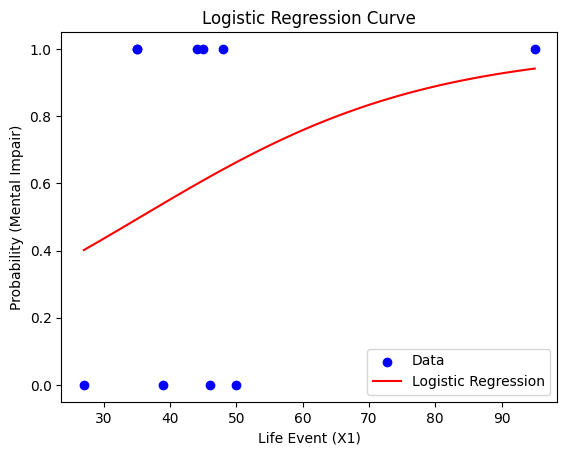

In [ ]:
import matplotlib.pyplot as plt

x_vals = np.linspace(df["Life Event (X1)"].min(), df["Life Event (X1)"].max(), 100)
y_vals = logistic(beta_optimal[0] + beta_optimal[1] * x_vals)

plt.scatter(df["Life Event (X1)"], df["Mental Impair (Y)"], label="Data", color="blue")
plt.plot(x_vals, y_vals, label="Logistic Regression", color="red")
plt.xlabel("Life Event (X1)")
plt.ylabel("Probability (Mental Impair)")
plt.legend()
plt.title("Logistic Regression Curve")
plt.show()
